### BOSTON PROPERTY ASSESSMENT FOR 2019

The main intention behind this project is to answer the question raised by a bunch of people I met in Boston. They were planning to make investments in properties in Boston and were willing to know the prices in different areas based on numerous parameters such as built year, remodeling year, the number of bedrooms, etc. For this reason, I planned to work on the authentic data provided on the Boston government website for the year 2019. The housing dataset has many variables that make it interesting to figure out which factors affect the assessed price of the houses. Interestingly all the variables are important and taken into consideration while deciding the prices of the Condominium units. However, there exist some variables that are more important than the other variables. Hence, I want to find out the answers to the following questions to dive deeper into the dataset. The main business questions concerning the group of people are as follows:
###### 1) How total assessed value of the property can be predicted?
###### 2) What has more impact, build year or remodelling year?
###### 3) Which parameters are capable of impacting total assessed value?

In [1]:
# Importing required packages
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import Capstone_Project as proj

# Data Extraction
Dataset: PROPERTY ASSESSMENT FY2019
This dataset consists of properties record of Boston city and is published by the Department of Innovation and Technology. It encompasses information that gives an assessment of property in Boston ( both taxable and non taxable) for year 2019. This dataset is used for analysis and creating a predictive model which will predict the total assessed value of Residential Condominium units based on the available property data. Furthermore, visuals will be used as part of data exploration and parameters will be assessed that impacts the total assessed value.

1 Dataset is available publicly on the website: https://data.boston.gov

2 The dataset can be downloaded directly and loaded as a pandas dataframe using Python

3 Link for dataset: https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/695a8596-5458-442b-a017-7cd72471aade/download/fy19fullpropassess.csv

4 Code to download the datset: Run the function named getData to load the dataset directly. The function can be imported from project or file including just the functions and are imported here in the notebook for better data representation using markdowns and clear visualizations. Also, the functions shows that basic properties of dataset like the number of instances, number of variables, and their names. It also decribes the summary of the target variable i.e. Total assessed value.

In [3]:
# Run function to load the data and check its basic properties
warnings.filterwarnings("ignore")
get_df = proj.getData()

Data Loaded Successfully !

The Shape of Boston Data Frame is (174668, 75)

The Total Columns of Boston Data Frame are
 Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF',
       'UNIT_NUM', 'ZIPCODE', 'PTYPE', 'LU', 'OWN_OCC', 'OWNER',
       'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'AV_LAND',
       'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'STRUCTURE_CLASS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_BTH_STYLE2',
       'R_BTH_STYLE3', 'R_KITCH', 'R_KITCH_STYLE', 'R_KITCH_STYLE2',
       'R_KITCH_STYLE3', 'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND',
       'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'S_NUM_BLDG',
       'S_BLDG_STYL', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN',
       'S_EXT_CND', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_CORNER', 'U_ORIENT',
       'U_TOT_R

# Cleaning up of the data
Since, people were majorly concerned about residential condominium units, So filters on respective columns were applied to fetch the required data to perform analysis.
1) Selection of subset of data: LU=CD (Residential Condominium unit) & PTPYE=102 (Residential Code) according to the occupancy code list.
2) Selection of subset of appropriate columns: The columns that are required to answer the business questions are filtered.
3) Dealing with the missing values: Remodeling year, built year and land area in square feet are the columns that have null values. Built year had the least null values (36) so they are dropped. Remodeling year has 10k instances of null values so they are replaced by the minimum value (0) in order to avoid loss of data.
4) Dealing with the categorical data: This is done by creating dummy variables.
5) Renaming the columns: In order to easily understand the column names, some columns are renamed.
RESULT: After cleaning the data the total number of rows and columns are 63860 and 23 respectively which was 174668 rows and 75 columns before data cleaning.


In [4]:
#Fetching the results of data cleaning
filt_df = proj.filterData(get_df)

Filter Data for Residential Condominium Units

The Shape of Filtered Boston Data Frame is (63896, 75)

The Selected Columns of Boston Data Frame are
 Index(['ZIPCODE', 'OWN_OCC', 'AV_TOTAL', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'U_BASE_FLOOR', 'U_NUM_PARK',
       'U_CORNER', 'U_ORIENT', 'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH',
       'U_HALF_BTH', 'U_HEAT_TYP', 'U_AC', 'U_FPLACE', 'U_INT_FIN',
       'U_INT_CND', 'U_VIEW'],
      dtype='object')

Summary of Boston Data Frame is given below
             ZIPCODE      AV_TOTAL       LAND_SF      YR_BUILT      YR_REMOD  \
count  63896.000000  6.389600e+04  63887.000000  63860.000000  53753.000000   
mean    2132.108833  6.777498e+05   1060.564340   1935.554901   1652.847618   
std       44.189406  7.326251e+05    567.270123     54.098769    753.166530   
min     2108.000000  4.170000e+04     40.000000      0.000000      0.000000   
25%     2116.000000  3.445000e+05    697.000000   1900.000000  

In [5]:
# Renaming columns for a better understanding
filt_df.rename(columns={'ZIPCODE': 'Zipcode', 'OWN_OCC': 'Owner_Occupancy','GROSS_AREA': 'Gross_Area','LIVING_AREA': 'Living_Area','AV_TOTAL': 'Assessed_Value', 'LAND_SF': 'Land_Area_SqFt','YR_BUILT': 'Built_Year','YR_REMOD': 'Remodeling_Year','NUM_FLOORS': 'Number_of_Floors','U_BASE_FLOOR': 'Base_floor','U_NUM_PARK': 'Number_of_parking_Spaces','U_CORNER': 'Corner_Unit','U_ORIENT':'Orientation','U_TOT_RMS': 'Total_Rooms','U_BDRMS': 'Total_Bedrooms','U_FULL_BTH': 'Total_Fullbath','U_HALF_BTH': 'Total_Halfbath','U_HEAT_TYP': 'Heating_Type','U_AC': 'AC_Type','U_FPLACE': 'Number_of_Fireplaces','U_INT_FIN': 'Interior_Finish','U_INT_CND': 'Interior_Condition','U_VIEW': '_Unit_View'}, inplace=True)


# Visualization of the Data
It is difficult for common people to understand data technically, So visuals were used to give them a rough understanding of various attributes of the data, the relationship between these different attributes, and the distribution of property prices. Heat maps, regression plots, and distribution plots were used to achieve each objective respectively.

##### Variable correlation
A heat map consists of values that are represented by various shades of the same color for each plotted value. This heat map depicts the correlation between various numerical values in the dataset. The darker shades represents higher values than the lighter shade. The target variable has a strong correlation with land area in square feet, gross area, living area and the total number of full bathrooms in the condo.


Text(0.5, 1.0, 'Correlation between the Variables')

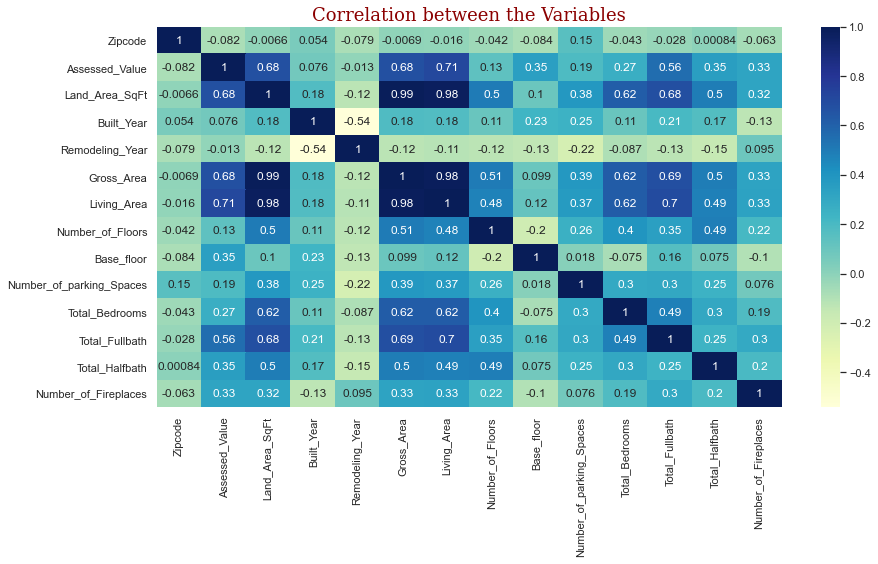

In [6]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
sns.set(font_scale=1.0)
plt.figure(figsize=(14,7))
hmap=sns.heatmap(filt_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between the Variables",fontdict=font)

##### Distribution of Total Assessed Value
The histogram represents the distribution of total assessed value. The x axis shows the target variable that is the total assessed value in thousands and y axis depicts the frequency. It can be seen that our histogram is skewed towards the right which tells us that with a decrease in the count of condo units there is an increase in the total assessed value. The red color plot is the first reference plot and it can be seen that the maximum number of condo units is under 1000k. Our second reference distribution plot (blue color) depicts that there are many units which are within the range of 200-800k.



Text(0, 0.5, 'Frequency')

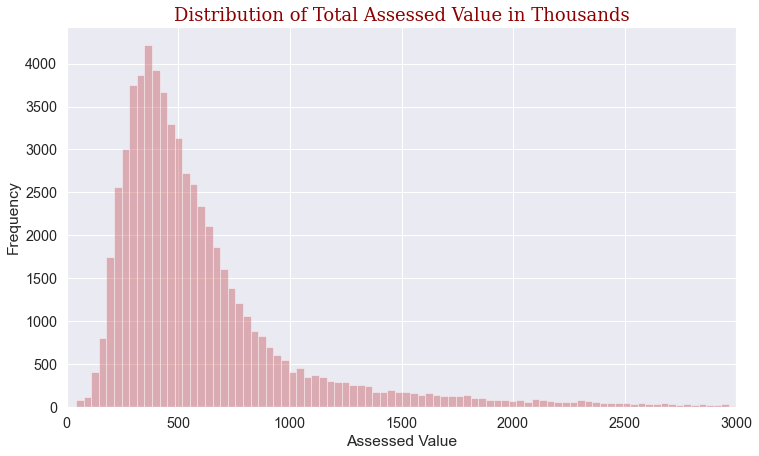

In [7]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
sns.set_context("notebook",font_scale=1.3, rc={"lines.linewidth":2.5})
plt.figure(figsize=(12,7))
AV_hist = sns.distplot(filt_df['Assessed_Value']/1000, bins=1000, kde=False, color='r')
AV_hist.set(xlim=(0, 3000))
sns.set_style("whitegrid")
plt.title("Distribution of Total Assessed Value in Thousands",fontdict=font) 
plt.xlabel("Assessed Value")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

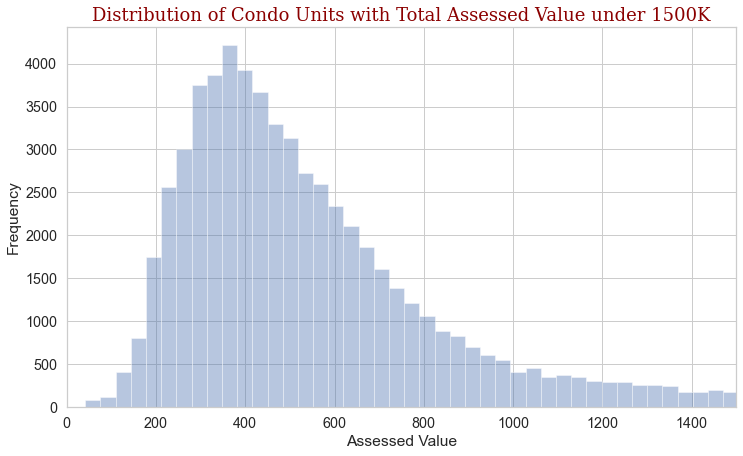

In [8]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }
sns.set_context("notebook",font_scale=1.3, rc={"lines.linewidth":2.5})
plt.figure(figsize=(12,7))
AV_hist = sns.distplot(filt_df['Assessed_Value']/1000, bins=1000, kde=False, color='b')
AV_hist.set(xlim=(0, 1500))
sns.set_style("whitegrid")
plt.title("Distribution of Condo Units with Total Assessed Value under 1500K",fontdict=font) 
plt.xlabel("Assessed Value")
plt.ylabel("Frequency")


##### Independent variables v/s dependent variables ( Regression Plot)
* Same distribution can be seen land area, gross area and land square feet. Outliers can be seen on the right hand side ion and top of the graph. On the left hand side strong correlation points can be clearly seen.
* The plot of number of floors shows concentration towards the left hand side of the graph. However, outliers can be seen on the right side and left most corner. The outlier on the right hand side is significant as the regression line changes its direction because of it.
* The graph of base floor shows the distribution of points that are scattered throughout the regression line. Outliers can be seen on the right hand side but they are not capable of creating a major impact on the regression line. 
* Left side has x outliers that have an impact on the regression line that can be seen in the graph of total number of bathrooms and bedrooms. In the graph of number of fireplaces the outliers do not have much impact whereas we can see same type of distribution when it comes to the number of floors and half bathrooms graph.
* OLS can be used for estimating the coefficients further as there is data that shows multicollinearity. We can see some correlation in the variables in three graphs (number of fireplaces, base floors and rooms), although there are no data points that depict a clear line correlation with the assessed value.


Regression Plot of Independent Variables vs Dependent Variable in Thousands


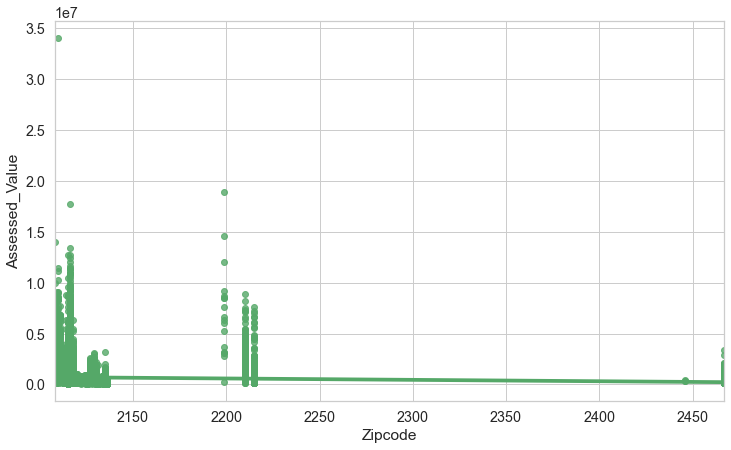

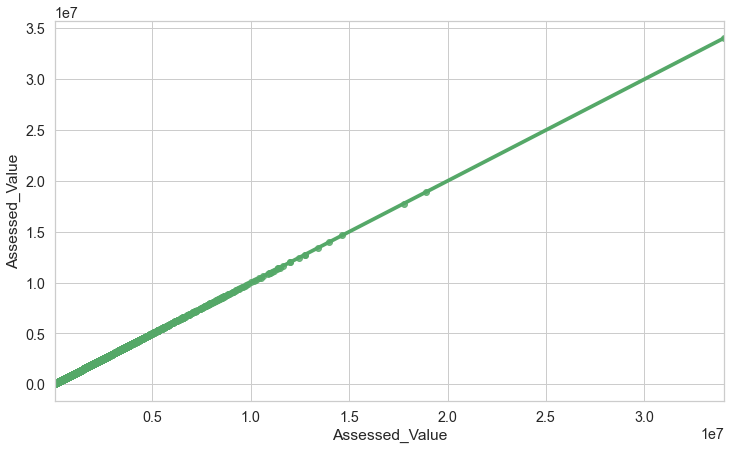

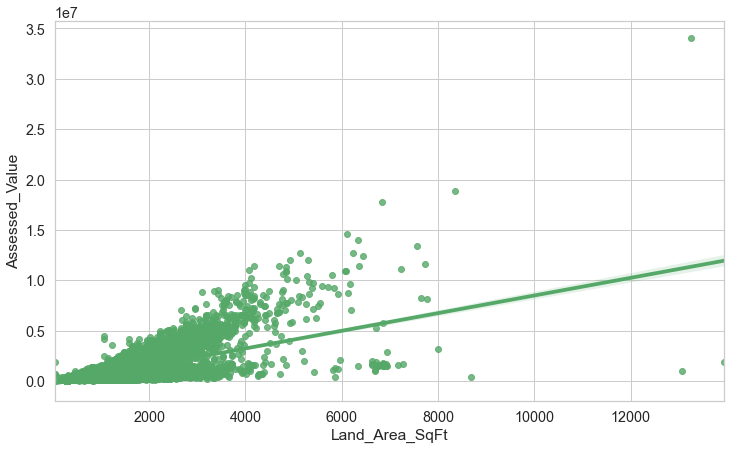

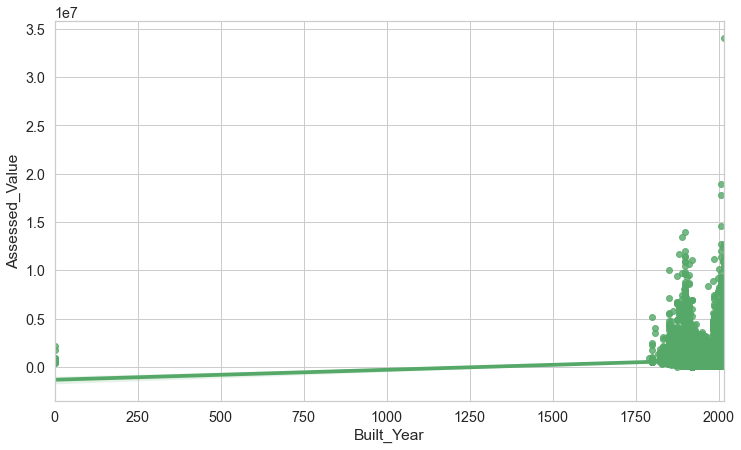

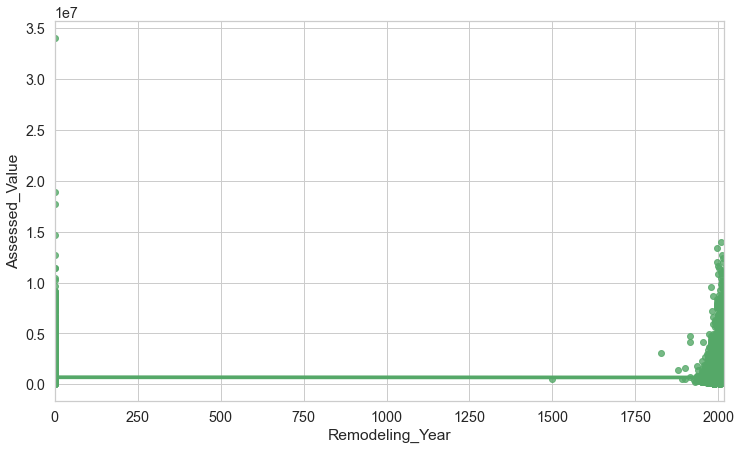

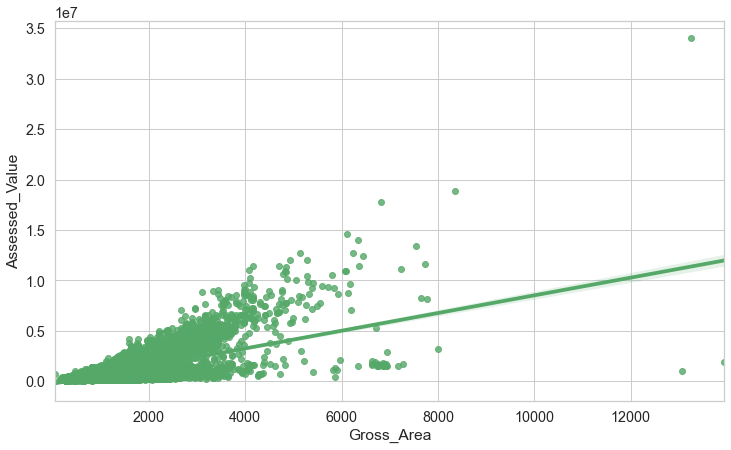

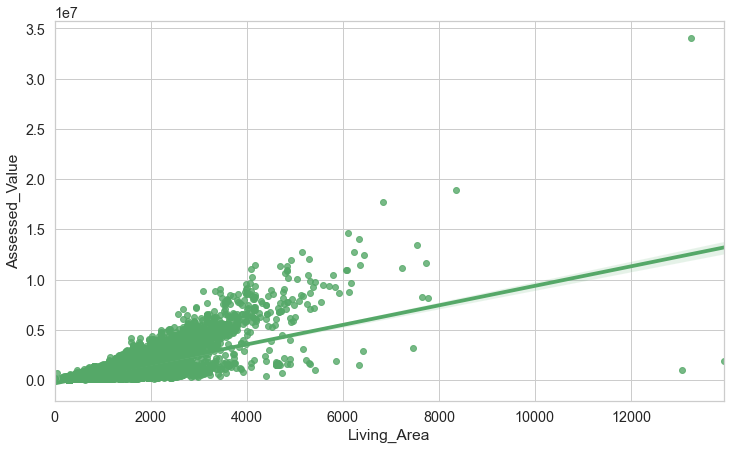

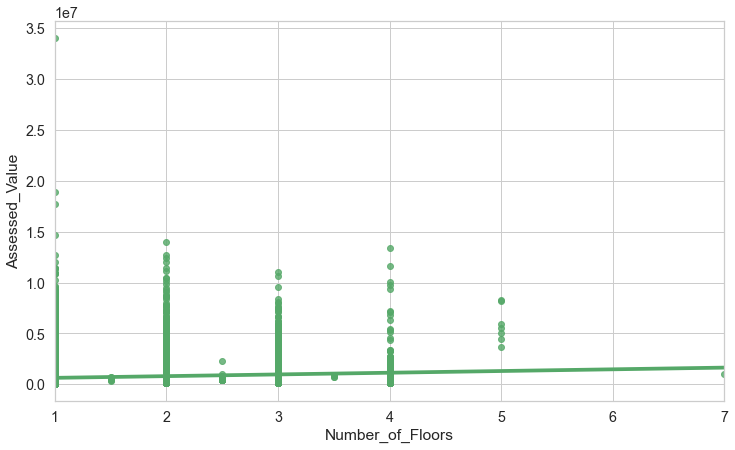

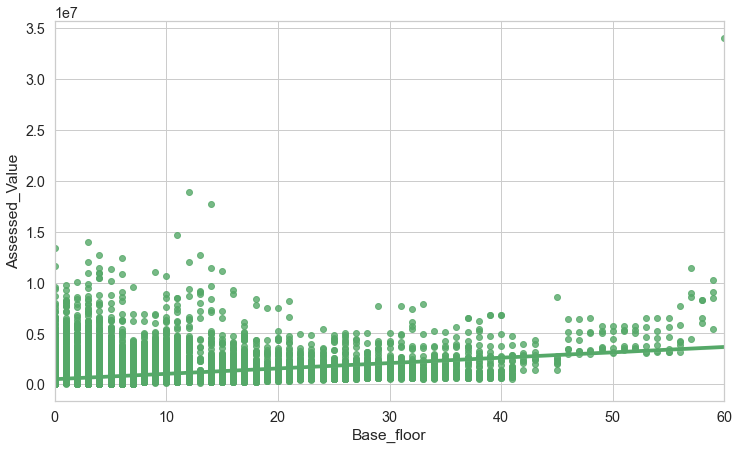

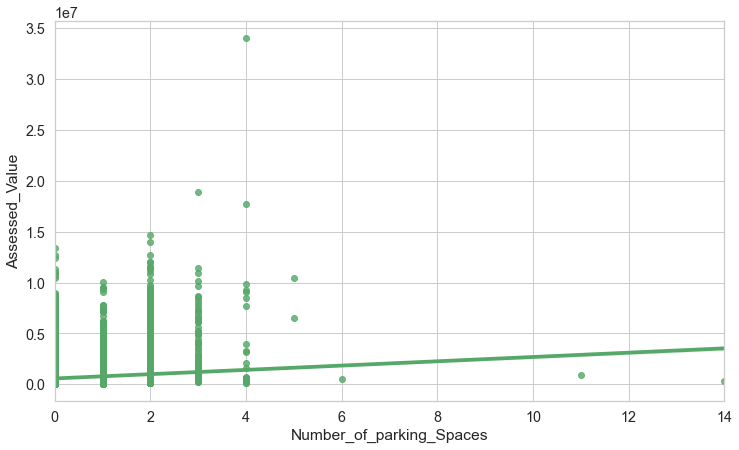

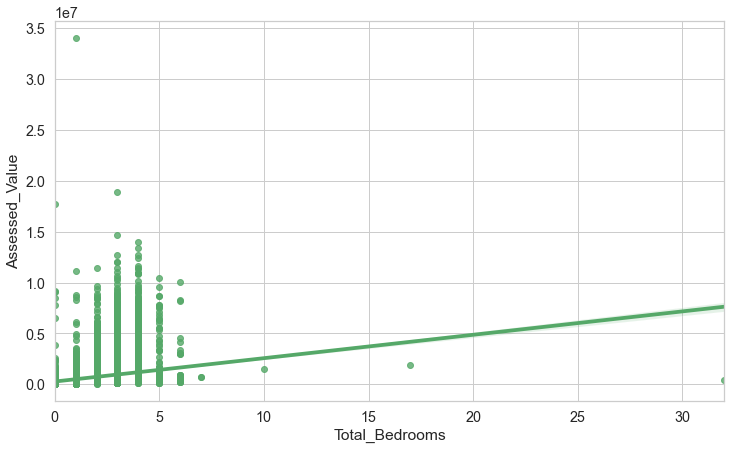

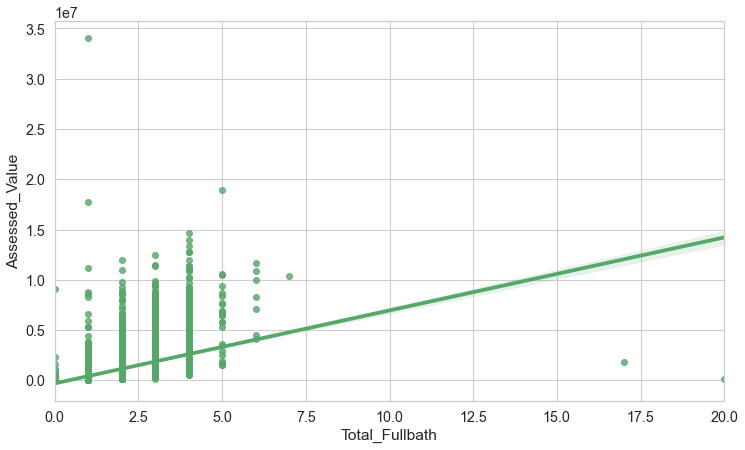

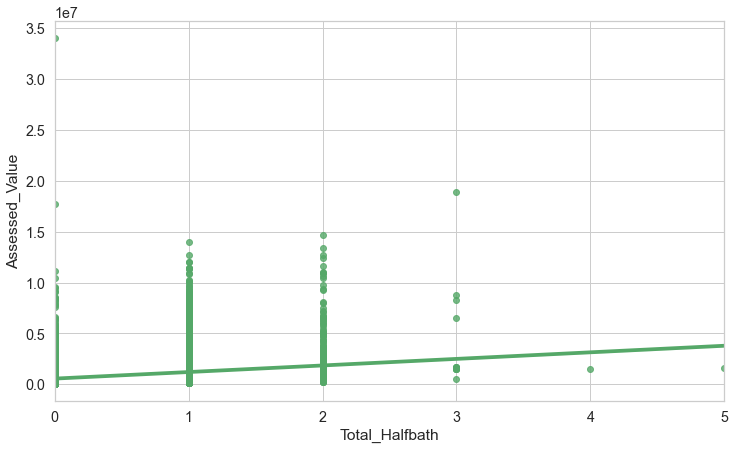

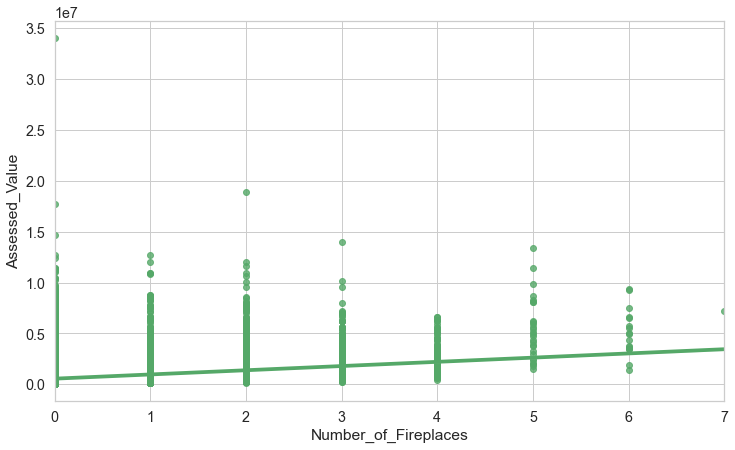

In [9]:
# Creating dataframe with numerical columns for plotting correlation scatterplot with target variable

cor_df = filt_df[filt_df.columns]
cor_df.drop(['Owner_Occupancy','Corner_Unit','Orientation','Total_Rooms','Heating_Type','AC_Type','Interior_Finish','Interior_Condition','_Unit_View'], axis=1, inplace=True)

print("Regression Plot of Independent Variables vs Dependent Variable in Thousands")
col_list=cor_df.columns
for i in range(len(col_list)):
    sns.set_context("notebook",font_scale=1.3, rc={"lines.linewidth":2.5})
    plt.figure(figsize=(12,7))
    sns.regplot(col_list[i], col_list[1], data=cor_df, color='g')
    plt.show()

# Predictive analytics

In [10]:
X=filt_df

In [11]:
# Categorical Feature Encoding to deal with the categorical variables. 
# To avoid dummy variable trap, original column and first dummy column is removed from the data containing 
# information related to independet variables. 

pd.Series(np.where(filt_df.Corner_Unit.values=='Y',1,0), filt_df.index)

#Create dummy columns for categorical variable and drop first column
zip_code = pd.get_dummies (X['Zipcode'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Zipcode', axis=1)
X = pd.concat ([X, zip_code], axis=1)

#Create dummy columns for categorical variable and drop first column
Own_occupancy = pd.get_dummies (X['Owner_Occupancy'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Owner_Occupancy', axis=1)
X = pd.concat ([X, Own_occupancy], axis=1)
Corner = pd.get_dummies (X['Corner_Unit'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Corner_Unit', axis=1)
X = pd.concat ([X, Corner], axis=1)

Orient = pd.get_dummies (X['Orientation'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Orientation', axis=1)
X = pd.concat ([X, Orient], axis=1)
Rooms = pd.get_dummies (X['Total_Rooms'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Total_Rooms', axis=1)
X = pd.concat ([X, Rooms], axis=1)

Heat = pd.get_dummies (X['Heating_Type'], drop_first=True)
#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Heating_Type', axis=1)
X = pd.concat ([X, Heat], axis=1)

AC = pd.get_dummies (X['AC_Type'], drop_first=True)
#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('AC_Type', axis=1)
X = pd.concat ([X, AC], axis=1)

Int_finish = pd.get_dummies (X['Interior_Finish'], drop_first=True)
#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Interior_Finish', axis=1)
X = pd.concat ([X, Int_finish], axis=1)

Int_Cond = pd.get_dummies (X['Interior_Condition'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('Interior_Condition', axis=1)
X = pd.concat ([X, Int_Cond], axis=1)

View = pd.get_dummies (X['_Unit_View'], drop_first=True)

#Remove the original energy type column and then concat the new dummy columns to original dataframe
X = X.drop ('_Unit_View', axis=1)
X = pd.concat ([X, View], axis=1)

In [12]:
X_df = X.drop(['Assessed_Value'], axis=1)
y_df = X[['Assessed_Value']]

In [13]:
# Dividing the dataset into two parts ( training and testing sets)
#Create training and testing set from the data, test data is 25% and train data is 75% of the total data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
           X_df, y_df, test_size=0.30, random_state=0)

###### Execution of Linear Model and it's performance check
Linear function is written in .py file. The execution of Linear Model yielded an accuracy of 81% based on the r square.

In [14]:
proj.linearModel(X_train, y_train, X_test, y_test)

Coefficients: 
 [[-5.73144700e+00 -3.56337161e+02  1.38807603e+01 -3.11446016e+02
   1.26417163e+03 -1.63635155e+05  1.46937623e+03  3.64257055e+04
  -4.82529880e+04  6.02915624e+04  6.81264396e+04  4.64534678e+04
  -1.69104794e+05 -3.15245124e+05 -3.66631904e+05 -2.10425578e+05
  -1.96109834e+05 -1.23307652e+05 -6.82591043e+03 -1.54657887e+05
  -6.76196921e+05 -5.69670913e+05 -6.85999472e+05 -6.52194326e+05
  -6.63701261e+05 -5.91587152e+05 -6.34459069e+05 -4.20441355e+05
  -5.24746064e+05 -4.25861156e+05 -5.75579719e+05 -6.49519259e+05
  -6.17186205e+05 -4.31005736e+05 -4.06575160e+05 -7.47823489e+05
   2.49268415e+06 -2.18823643e+05 -1.97643513e+05 -6.89743164e+05
  -7.23419730e+05 -3.55922602e+04  2.73719500e+04  2.00684718e+03
  -3.02791518e+04  1.36872386e+04 -2.98140655e+04  2.11179425e+04
   2.55311465e+04  2.18390391e+04 -7.71639222e+03 -6.25114851e+04
  -1.01546727e+05  1.57350780e+05  1.82376731e+05  2.03564525e+05
   1.66792221e+05  1.15075347e+05  3.98123972e+04  2.3002367

###### Execution of ordinary least square method to estimate coefficients and checking the performance of the model

In [15]:
import statsmodels.api as sm
proj.olsMethod(X_train,y_train)

OLS Model Summary is shown below:                            OLS Regression Results                            
Dep. Variable:         Assessed_Value   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1814.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:41:28   Log-Likelihood:            -6.3030e+05
No. Observations:               44702   AIC:                         1.261e+06
Df Residuals:                   44597   BIC:                         1.262e+06
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [16]:
proj.olsMethod(X_test,y_test)

OLS Model Summary is shown below:                            OLS Regression Results                            
Dep. Variable:         Assessed_Value   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     930.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:41:29   Log-Likelihood:            -2.6941e+05
No. Observations:               19158   AIC:                         5.390e+05
Df Residuals:                   19065   BIC:                         5.397e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [17]:
proj.lassoReg(X_train,y_train,X_test,y_test)

Perform regularization on the data using Lasso Regression
                   0  Coefficient Estimate
0     Land_Area_SqFt         -5.620632e+00
1         Built_Year         -3.568083e+02
2    Remodeling_Year          1.388470e+01
3         Gross_Area         -3.115358e+02
4        Living_Area          1.264230e+03
..               ...                   ...
100                E          3.228616e+05
101                F         -3.720275e+04
102                G          2.365255e+04
103                P         -9.440129e+04
104                S          1.621898e+06

[105 rows x 2 columns]


Model performance on Training data after Regularization is 0.8088356952665217


Model performance on Testing data after Regularization is 0.8085357692903428


#### Descriptive analysis & Solutions to the business questions
Three algorithms were used for predicting the total assessed value of the condominium units. R-square was used for assessing the performance of the algorithms. There is relatively less difference in the performance of these three algorithms. While applying the OLS method many variables turned out to be less important based on the p-value and coefficients. Lasso regression was used for performance improvement and to regularize the model.
Data cleaning was performed to turn the raw state of data into technically consistent data. To deal with the categorical data, categorical feature encoding is done. This helped to perform regression effectively. Training and testing data were divided as 70% and 30%. The features that have a positive correlation with the target variable and have an impact on the total assessed value of the condo units are gross area, living area, land area, and the number of full bathrooms in condo units. Also, Regression plots are used to assess the relationship between the independent variable and the target variable. Further, based on the coefficients, it can be concluded that the total assessed value has a major impact by the built year rather than the remodeling year. Also, Zipcode is a strong predictor to predict the price of houses as prices vary according to the location. 
It can be observed from the data visualization section that the total assessed value of the maximum condo units is under 1000k. 


References:

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://seaborn.pydata.org/tutorial/distributions.html

https://howtothink.readthedocs.io/en/latest/PvL_H.html

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf